In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, t
%matplotlib inline

In [4]:
mu, s2 = 10, 9
sigma = np.sqrt(s2)

In [5]:
s = norm.rvs(loc=mu, scale=sigma, size=50, random_state=42)

## Task 1

### (a)

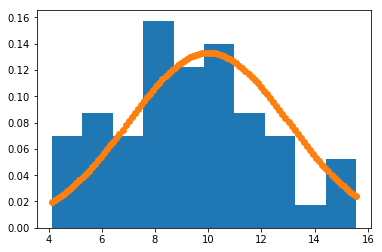

In [6]:
plt.hist(s, normed=True)
x = np.linspace(np.min(s), np.max(s), 100)
plt.plot(x, norm.pdf(x, mu, sigma), '-o')

### (b)

In [7]:
t_dist = t.rvs(5, size=50, random_state=42)

$$t_{transformed} = 10+ 3 sqrt(3/5)* y_i$$

In [8]:
transformed_t = 10 + 3 * np.sqrt(3/5) * t_dist

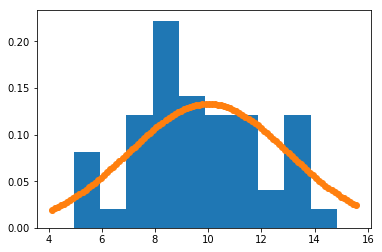

In [9]:
plt.hist(transformed_t, normed=True)
plt.plot(x, mlab.normpdf(x, mu, sigma), '-o')

## Task 2

### (a)

In [11]:
p = 49
outlier_sample = [16 + index * 8 / p for index in range(0, 50)]

### Mean

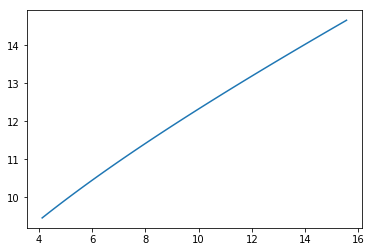

In [12]:
x = np.linspace(np.min(s), np.max(s), 50)
means = []
for i in range(1, len(outlier_sample) + 1):
    sample = np.concatenate((s, outlier_sample[:i]))
    means.append(np.mean(sample))
plt.plot(x, means)

### Median

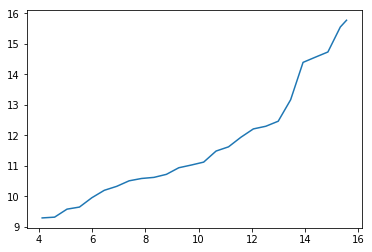

In [13]:
x = np.linspace(np.min(s), np.max(s), 50)
medians = []
for i in range(1, len(outlier_sample) + 1):
    sample = np.concatenate((s, outlier_sample[:i]))
    medians.append(np.median(sample))
plt.plot(x, medians)

### Variance

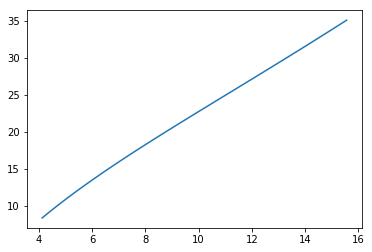

In [14]:
x = np.linspace(np.min(s), np.max(s), 50)
variances = []
for i in range(1, len(outlier_sample) + 1):
    sample = np.concatenate((s, outlier_sample[:i]))
    variances.append(np.var(sample))
plt.plot(x, variances)

### (b)

In [15]:
additional_samples = []
for i in range(10, 100):
    additional_samples.append(norm.rvs(20, 2, size=i))

### All subsamples histogram

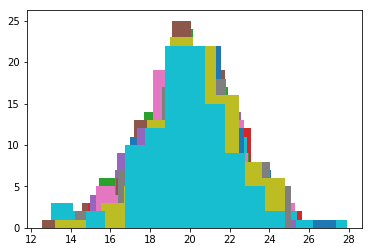

In [16]:
for i in additional_samples:
    plt.hist(i)

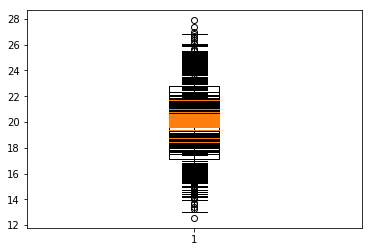

In [17]:
for i in additional_samples:
     plt.boxplot(i)

### Few different m

{'boxes': [<matplotlib.lines.Line2D at 0x1153d5fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x1153e5668>,
 'fliers': [<matplotlib.lines.Line2D at 0x1153eef60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1153ee048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1153d54a8>,
  <matplotlib.lines.Line2D at 0x1153ddf60>]}

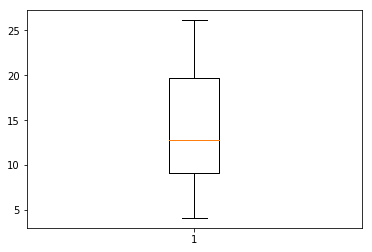

In [18]:
m = 30

sample = np.concatenate((s, additional_samples[m]))
plt.boxplot(sample)

(array([  4.,   4.,   5.,   5.,  10.,   7.,   6.,   4.,   1.,   3.,   2.,
          4.,   4.,   7.,   9.,   6.,   6.,   1.,   1.,   1.]),
 array([  4.12098963,   5.22101172,   6.32103381,   7.4210559 ,
          8.52107799,   9.62110008,  10.72112217,  11.82114426,
         12.92116635,  14.02118844,  15.12121053,  16.22123262,
         17.32125471,  18.4212768 ,  19.52129889,  20.62132098,
         21.72134307,  22.82136516,  23.92138725,  25.02140934,  26.12143143]),
 <a list of 20 Patch objects>)

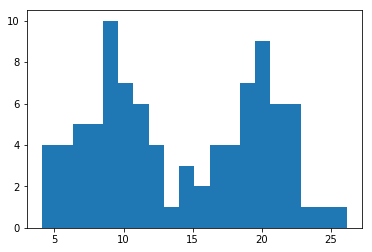

In [19]:
plt.hist(sample, bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x115569c88>],
 'caps': [<matplotlib.lines.Line2D at 0x115570160>,
 'fliers': [<matplotlib.lines.Line2D at 0x115581978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1155812b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x115569ac8>,
  <matplotlib.lines.Line2D at 0x115570d30>]}

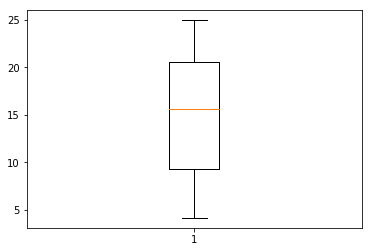

In [20]:
m = 40 
sample = np.concatenate((s, additional_samples[m]))
plt.boxplot(sample)

(array([  4.,   4.,   4.,   4.,  11.,   5.,   7.,   5.,   2.,   1.,   3.,
          2.,   3.,   2.,   7.,  12.,   9.,   8.,   5.,   2.]),
 array([  4.12098963,   5.16388637,   6.20678311,   7.24967985,
          8.29257658,   9.33547332,  10.37837006,  11.4212668 ,
         12.46416354,  13.50706028,  14.54995702,  15.59285376,
         16.6357505 ,  17.67864723,  18.72154397,  19.76444071,
         20.80733745,  21.85023419,  22.89313093,  23.93602767,  24.97892441]),
 <a list of 20 Patch objects>)

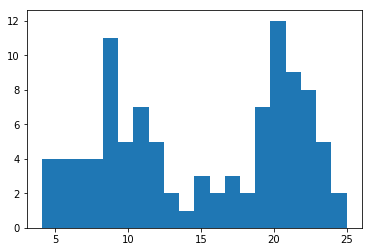

In [21]:
plt.hist(sample, bins=20)

### (d)

### Animated

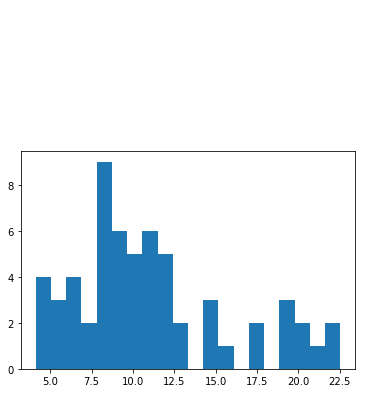

In [41]:
import matplotlib.animation as animation

samples = []
for _ in additional_samples:
    samples.append(np.concatenate((s, _)))
    
n = 100
number_of_frames = len(samples)


def update_hist(num, samples):
    plt.cla()
    plt.hist(samples[num], bins=20)

fig = plt.figure()
hist = plt.hist(samples[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(samples, ) )
plt.show()

## Task 3